<a href="https://colab.research.google.com/github/DmitryKutsev/hse_compling_homework/blob/master/hw5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get --yes install git make cmake build-essential libboost-all-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
make is already the newest version (4.1-9.1ubuntu1).
make set to manually installed.
libboost-all-dev is already the newest version (1.65.1.0ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.5).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [2]:
!pip install protobuf tqdm wheel

In [3]:
!git clone --branch=stable https://github.com/bigartm/bigartm.git

Cloning into 'bigartm'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 16526 (delta 11), reused 16 (delta 5), pack-reused 16497
Receiving objects: 100% (16526/16526), 17.16 MiB | 19.99 MiB/s, done.
Resolving deltas: 100% (11554/11554), done.


In [4]:
cd bigartm

/content/bigartm


In [0]:
mkdir build

In [6]:
cd build

/content/bigartm/build


In [7]:
!cmake ..

-- The C compiler identification is GNU 7.4.0
-- The CXX compiler identification is GNU 7.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Build type: Release
-- Looking for include file unistd.h
-- Looking for include file unistd.h - found
-- Boost version: 1.65.1
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Lookin

In [8]:
!make

Scanning dependencies of target libprotobuf
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arena.cc.o
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arenastring.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/extension_set.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/generated_message_util.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/coded_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream_impl_lite.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/

In [9]:
!pip install python/bigartm*.whl -U

Processing ./python/bigartm-0.10.0-cp36-cp36m-linux_x86_64.whl


In [10]:
cd ../..

/content


In [11]:
!pip install pymorphy2[fast] nltk gensim

     |████████████████████████████████| 51kB 1.6MB/s 
     |████████████████████████████████| 7.1MB 6.4MB/s 
     |████████████████████████████████| 256kB 38.0MB/s 
  Created wheel for DAWG: filename=DAWG-0.7.8-cp36-cp36m-linux_x86_64.whl size=771537 sha256=a4e01b5360f4447d63a1f0f1bbcc210a13e31fcb5f543488239f2d7ebff382d7
  Stored in directory: /root/.cache/pip/wheels/d4/88/d0/4e4abc83eb8f59a71e8dbd8ba99fd5615a3af1fac1ef7f8825
Successfully built DAWG


In [12]:
import artm
%matplotlib inline
import glob
import os, re
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from nltk.corpus import stopwords
import numpy as np
from pymorphy2 import MorphAnalyzer
import gensim, nltk
import string
morph = MorphAnalyzer()
from nltk.tokenize import word_tokenize

/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [13]:
nltk.download('punkt');
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stops = set(stopwords.words('russian')) | {'gt',}
add_list = ["англ", "хабра", "хабр", "поль", "lt;div", "поэтому", "вообще",  "что-то", "джон", "кстати", "потихоньку" "крис",
            "плохо", "хорошо", "назад", "пожалуйста", "спасибо", "мк", "ми", "ос", 
            "добро", "где-нибудь", "null", "пока", "либо", "ия", "мс", "ый"] #добавил непонятные слова, и слова, 
#которые встречаются в большинстве топиков вообще, и еще аббривеатуры 
add_list = [stops.add(i) for i in add_list]

def remove_tags(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'[0-9.…•"«№“’”»±€×—]+', '', text)
    text = re.sub(r'^[A-ZА-Яa-zа-я]{1,3}\b', '', text)
    text = re.sub(r'\b[A-ZА-Яa-zа-я]{1,3}$', '', text)  
    return re.sub(r'\b[A-ZА-Яa-zа-я]{1,3}\b', '', text) #попробую убрать на этот раз не латиницу, а все слова из 1-3 символов


def opt_normalize(texts, top=None):
    uniq = Counter()
    for text in texts:
        uniq.update(text)
    
    norm_uniq = {word:morph.parse(word.replace(':', ''))[0].normal_form for word, _ in uniq.most_common(top)}
    
    norm_texts = []
    for text in texts:
        
        norm_words = [norm_uniq.get(word) for word in text]
        norm_words = [word for word in norm_words if word and word not in stops]
        norm_texts.append(norm_words)
        
    return norm_texts

def tokenize(text):
    words = [word.strip(string.punctuation) for word in text.split()]
    words = [word for word in words if len(word)> 3] 
    
    return words

In [147]:
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip

--2020-02-03 23:04:52--  https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip [following]
--2020-02-03 23:04:52--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18645068 (18M) [application/zip]
Saving to: ‘habr_texts.txt.zip.4’

habr_texts.txt.zip. 100%[===================>]  17.78M  27.7MB/s    in 0.6s    

2020-02-03 23:04:53 (27.7 MB/s) - ‘habr_t

In [148]:
!unzip habr_texts.txt.zip

Archive:  habr_texts.txt.zip
replace habr_texts.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [196]:
texts = open('habr_texts.txt').read().splitlines()
texts = opt_normalize([tokenize(remove_tags(text.lower())) for text in texts], 30000)
texts[:30]

[['masstransit',
  'open',
  'source',
  'библиотека',
  'разработать',
  'язык',
  'платформа',
  'работа',
  'шина',
  'дать',
  'который',
  'использоваться',
  'построение',
  'распределенный',
  'приложение',
  'реализация',
  'service',
  'architecture',
  'качество',
  'message',
  'мочь',
  'выступать',
  'rabbitmq',
  'azure',
  'service',
  'memory',
  'менеджер',
  'случай',
  'memory',
  'область',
  'видимость',
  'ограничиваться',
  'процесс',
  'который',
  'событие',
  'контракт',
  'сообщение',
  'формат',
  'сообщение',
  'consumer',
  'конфигурация',
  'контейнер',
  'observer',
  'новое',
  'masstransit',
  'заключение',
  'опрос',
  'библиотека',
  'использовать',
  'команда',
  'событие',
  'библиотека',
  'заложить',
  'основный',
  'тип',
  'сообщение',
  'команда',
  'необходимость',
  'выполнить',
  'некий',
  'действие',
  'наиболее',
  'наименование',
  'команда',
  'желательно',
  'использовать',
  'структура',
  'работа',
  'команда',
  'осуществляться',
 

In [0]:
# вернемся сюда через какое-то время
# ph = gensim.models.Phrases(habr_texts, scoring='npmi', threshold=0.3, 
#                            common_terms=set(stopwords.words('russian'))) # можно указать слова, которые 
                                                                          # не будут учитываться
# p = gensim.models.phrases.Phraser(ph)
# ngrammed_habr_texts = p[habr_texts]

In [0]:
# p[habr_texts[1]]

In [0]:
f = open('habr_texts.vw', 'w')

for i, text in enumerate(texts):
    c = Counter(text)
    doc = 'doc_'+ str(i) + ' '
    vw_text = ' '.join([x+':'+str(c[x]) for x in c])
    
    f.write(doc + vw_text  + '\n')
f.close()

In [0]:
def print_measures(model_artm):
    print('Sparsity Phi: {0:.3f} ARTM)'.format(
        model_artm.score_tracker['SparsityPhiScore'].last_value)
)
    print('Sparsity Theta: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['SparsityThetaScore'].last_value))

    print('Kernel contrast: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast))

    print('Kernel purity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_purity))

    print('Perplexity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['PerplexityScore'].last_value)
)
    plt.plot(range(model_artm.num_phi_updates), model_artm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel(' ARTM perp. (red)')
    plt.grid(True)
    plt.show()

In [0]:

batch_vectorizer = artm.BatchVectorizer(data_path='habr_texts.vw',  # название файла
                                        data_format='vowpal_wabbit', # формат файла, у нас vw
                                        target_folder='batches', # название папки в которую положаться батчи
                                       batch_size=1000) # размер батча, подбирайте под свою память

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='batches', # название папки с батчами
                                        data_format='batches') # указываем формат - батчи

In [0]:
dictionary = artm.Dictionary()

In [202]:
dictionary.gather(data_path='batches')
dictionary.filter(class_id='@default_class',
                  min_df=10, max_df=2000)

artm.Dictionary(name=37d7809a-5bda-4a1b-9c9b-c879b02bb375, num_entries=9824)

In [0]:
dictionary.save_text('dict.txt')
# dictionary = artm.Dictionary()
# dictionary.load_text('dict.txt')

In [0]:

model_artm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(200)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=0.25, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=0.15, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)])
                                    ]
                        )

In [0]:
model_artm.initialize(dictionary=dictionary, )

In [0]:
model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) # разреженность слов в темах
model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) # разреженность тем в доках
model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) # когерентность по семантичесим ядрам
model_artm.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) # топ-n-слов для каждой темы

In [0]:
model_artm.num_document_passes = 2
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=3)

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.001 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 1019.496 (ARTM)


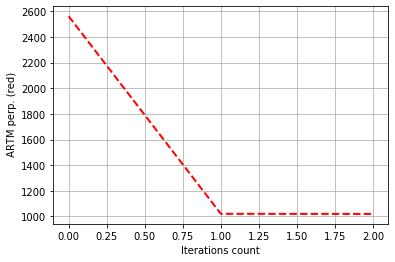

In [208]:
print_measures(model_artm)

In [0]:
model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=['topic_{}'.format(i) for i in range(1, 200)],
                                                            ))
model_artm.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=['topic_{}'.format(i) for i in range(1, 200)]))

In [0]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

In [0]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.5))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

Sparsity Phi: 0.749 ARTM)
Sparsity Theta: 0.106 (ARTM)
Kernel contrast: 0.270 (ARTM)
Kernel purity: 0.214 (ARTM)
Perplexity: 585.489 (ARTM)


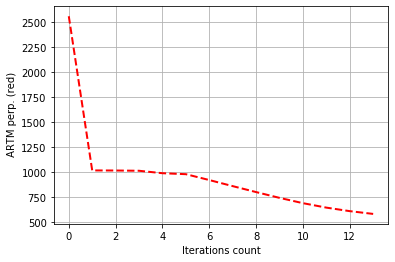

In [212]:
print_measures(model_artm)

In [213]:
# посмотрим на темы
for topic_name in model_artm.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError: # можно перекрутить параметры и некоторые темы окажутся пустыми
        continue

topic_0: 
поезд
твой
забавно
потихоньку
подборка
вооружение
тупо
капитан
fixed
кат
---------
topic_1: 
атака
защита
уязвимость
злоумышленник
устройство
безопасность
вредоносный
хакер
угроза
жертва
---------
topic_2: 
человек
курс
лицо
социальный
слово
чувство
говорить
дело
сказать
фотография
---------
topic_3: 
результат
решение
процесс
количество
являться
номер
задача
необходимый
связь
следующий
---------
topic_4: 
процессор
intel
накопитель
вычислительный
чип
кристалл
fpga
транзистор
компьютер
поколение
---------
topic_5: 
позволять
процесс
являться
программа
блок
использование
устройство
вид
простой
параметр
---------
topic_6: 
пользователь
ваш
использование
простой
задача
статья
любой
хотеть
необходимый
вопрос
---------
topic_7: 
заказчик
задача
заявка
нагрузка
мониторинг
ресурс
исполнитель
срок
проект
объём
---------
topic_8: 
конференция
доклад
участник
тема
выступление
рассказать
мероприятие
спикер
билет
вопрос
---------
topic_9: 
программа
точка
алгоритм
часть
некоторый
слово
я